In [13]:
import numpy as np
import pandas as pd
import pymc as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/dustywhite7/Econ8310/master/AssignmentData/cookie_cats.csv")

observations_A = data[data['version'] == 'gate_30']
observations_A1 = observations_A[["retention_1"]].to_numpy().flatten()
observations_A7 = observations_A[["retention_7"]].to_numpy().flatten()
observations_B = data[data['version'] == 'gate_40']
observations_B1 = observations_B[["retention_1"]].to_numpy().flatten()
observations_B7 = observations_B[["retention_7"]].to_numpy().flatten()
print("Ex: Obs from Gate 30 for 1 day retention (Controll) Retention 1: ", observations_A1[:30], "...")
print("Ex: Obs from Gate 30 for 7 day retention (Controll) Retention 1: ", observations_A7[:30], "...")
print("Ex: Obs from Gate 40 for 1 day retention (Test) Retention 1: ", observations_B1[:30], "...")
print("Ex: Obs from Gate 40 for 7 day retention (Test) Retention 1: ", observations_B7[:30], "...")

Ex: Obs from Gate 30 for 1 day retention (Controll) Retention 1:  [False  True False False  True  True  True  True  True  True  True False
 False False False False  True  True False False False False False False
 False  True False  True  True  True] ...
Ex: Obs from Gate 30 for 7 day retention (Controll) Retention 1:  [False False False False False  True False False  True  True False  True
 False False False False False False False False False False False False
 False  True False False False False] ...
Ex: Obs from Gate 40 for 1 day retention (Test) Retention 1:  [ True False  True  True False  True  True False  True False  True  True
  True False  True  True False False False  True  True False  True False
 False False  True  True False False] ...
Ex: Obs from Gate 40 for 7 day retention (Test) Retention 1:  [False False  True  True False  True False  True False False False False
  True False  True  True False False False False False False False False
 False False False False False Fal

In [15]:
print("Obs 1 Day Retention Mean from Gate 30 (Controll): ", np.mean(observations_A1))
print("           Obs 1 Day Retention Mean from Gate 40: ", np.mean(observations_B1))
print("Obs 7 Day Retention Mean from Gate 30 (Controll): ", np.mean(observations_A7))
print("           Obs 7 Day Retention Mean from Gate 40: ", np.mean(observations_B7))

Obs 1 Day Retention Mean from Gate 30 (Controll):  0.4481879194630872
           Obs 1 Day Retention Mean from Gate 40:  0.44228274967574577
Obs 7 Day Retention Mean from Gate 30 (Controll):  0.19020134228187918
           Obs 7 Day Retention Mean from Gate 40:  0.18200004396667327


In [16]:
# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
true_p_A = 0.05
true_p_B = 0.04

with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)

    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)


    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A1)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B1)

    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step,chains=2)
    # if you use return_inferencedata=False, the code below will still work, but for little ArviZ, let's use the default True value.
    #burned_trace=trace[1000:]

Output()

Output()

In [17]:
p_A_samples =  np.concatenate(trace.posterior.p_A.data[:,1000:])
p_B_samples =  np.concatenate(trace.posterior.p_B.data[:,1000:])
delta_samples = np.concatenate(trace.posterior.delta.data[:,1000:])

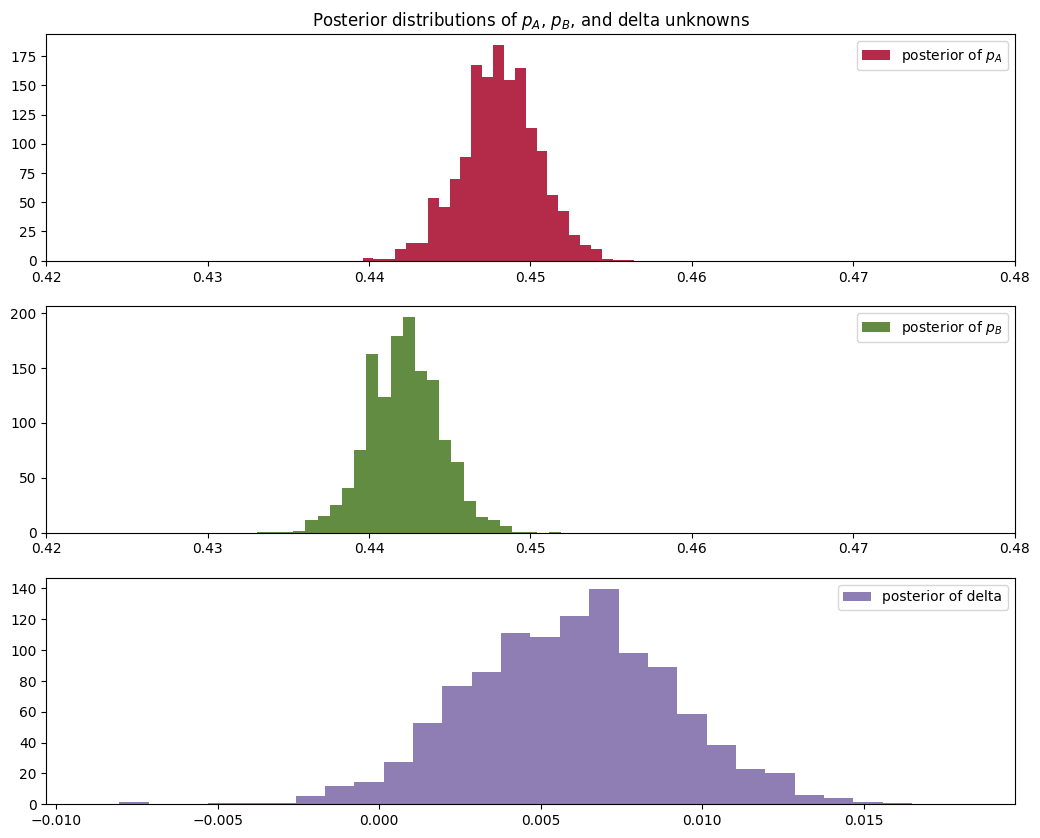

In [18]:
figsize(12.5,10)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0.42, .48)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", density=True)
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0.42, .48)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", density=True)
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", density=True)
plt.legend(loc="upper right");

In [19]:
print("Probability Gate 30 is WORSE than Gate 40 for 1-day retention: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability Gate 30 is BETTER than Gate 40 for 1-day retention: %.3f" % \
    np.mean(delta_samples > 0))

Probability Gate 30 is WORSE than Gate 40 for 1-day retention: 0.030
Probability Gate 30 is BETTER than Gate 40 for 1-day retention: 0.970


In [20]:
# Set up the pymc model. Again assume Uniform priors for p_A and p_B.
true_p_A = 0.05
true_p_B = 0.04

with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)

    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)


    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A7)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B7)

    # To be explained in chapter 3.
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step,chains=2)
    # if you use return_inferencedata=False, the code below will still work, but for little ArviZ, let's use the default True value.
    #burned_trace=trace[1000:]

Output()

/usr/local/lib/python3.10/dist-packages/pymc/step_methods/metropolis.py:313: RuntimeWarning: overflow encountered 
in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),

Output()

In [21]:
p_A_samples =  np.concatenate(trace.posterior.p_A.data[:,1000:])
p_B_samples =  np.concatenate(trace.posterior.p_B.data[:,1000:])
delta_samples = np.concatenate(trace.posterior.delta.data[:,1000:])

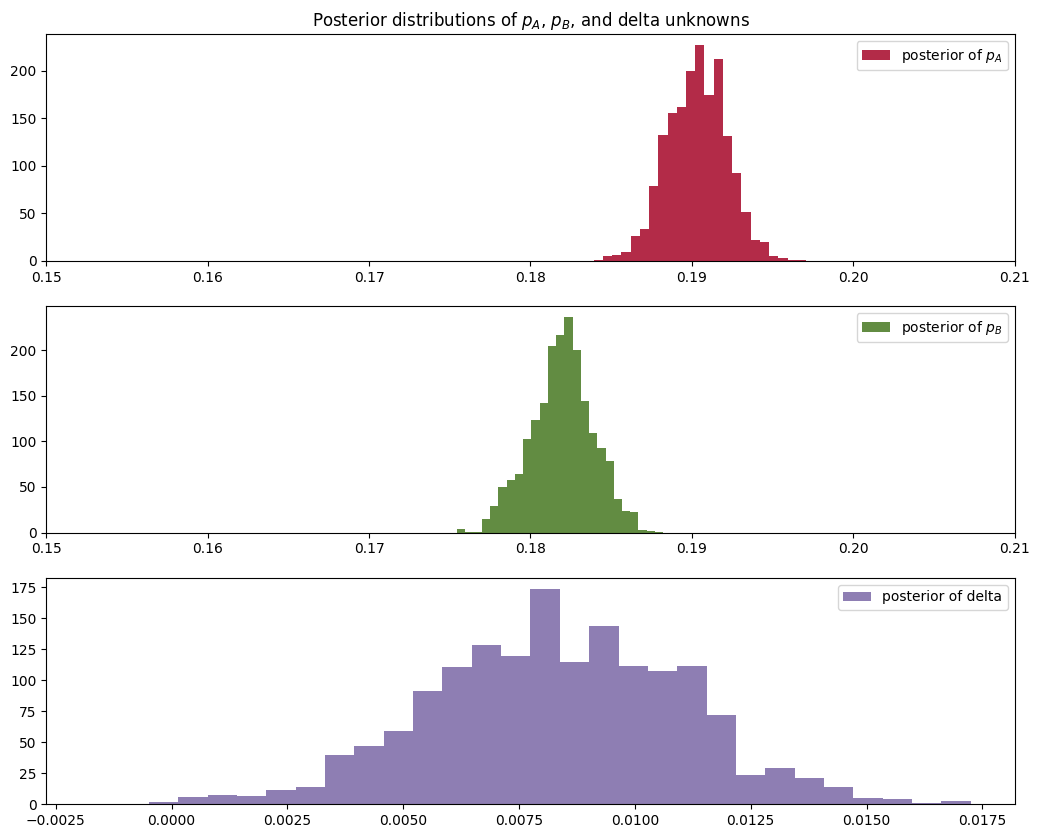

In [25]:
figsize(12.5,10)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0.15, 0.21)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", density=True)
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0.15, 0.21)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", density=True)
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", density=True)
plt.legend(loc="upper right");

In [26]:
print("Probability Gate 30 is WORSE than Gate 40 for 7-day retention: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability Gate 30 is BETTER than Gate 40 for 7-day retention: %.3f" % \
    np.mean(delta_samples > 0))

Probability Gate 30 is WORSE than Gate 40 for 7-day retention: 0.001
Probability Gate 30 is BETTER than Gate 40 for 7-day retention: 0.999
